# Exploring Dandiset 001361: A Flexible Hippocampal Population Code for Experience Relative to Reward

*Notebook generated with the assistance of AI. Please be cautious interpreting code and results, and verify key findings before drawing strong scientific conclusions.*

---

## Overview

This notebook introduces [Dandiset 001361](https://dandiarchive.org/dandiset/001361/0.250406.0045):  
**"A flexible hippocampal population code for experience relative to reward"**  
(Sosa, Plitt, & Giocomo, *Nature Neuroscience*, 2025).

This dataset contains two-photon calcium imaging and behavioral data from mouse hippocampus (CA1) as animals navigate a virtual environment with hidden, shifting reward locations. The Dandiset provides NWB files for 152 experimental sessions from 11 subjects, supporting exploration of hippocampal population coding and its relation to experience and reward.

---

## What does this notebook cover?

- Overview of the dataset contents, organization, and structure.
- How to list and access data files using the DANDI API.
- How to stream and explore NWB data from the archive (without local downloads).
- Visualizations of:
  - Behavioral signals (position, speed, licks, trial number, reward zone events).
  - Imaging summary images (max projection/mean projection).
  - Cell segmentation/ROI table statistics.
  - Fluorescence traces for single cells and the population.
- Guidance for customizing analyses and starting your own reanalysis.

---

## Required Packages

This notebook uses the following Python packages (assumed to be pre-installed):

- `dandi`  
- `pynwb`
- `remfile`
- `h5py`
- `numpy`
- `matplotlib`
- `pandas`

---

## Getting Started: Dandiset Summary

- **Dandiset:** [DANDI:001361](https://dandiarchive.org/dandiset/001361/0.250406.0045)
- **Subjects:** 11 mice, each with multiple sessions.
- **Data provided:** Two-photon calcium imaging, Suite2p segmentation, and detailed behavioral time series for each session.
- **Data format:** Neurodata Without Borders (NWB)
- **Total NWB files:** 152 (~92 GB)

Each NWB file contains data for one subject/one session: complete imaging, ROIs, and synchronized behavioral variables.

## Using the DANDI API to List NWB Files in the Dandiset

We'll use the DANDI Python API to connect to the archive and list information for the NWB files in this Dandiset.

In [1]:
from dandi.dandiapi import DandiAPIClient
import pandas as pd

# Open the Dandiset and retrieve the list of .nwb assets
dandiset_id = '001361'
dandiset_version = '0.250406.0045'
with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    assets = list(dandiset.get_assets_by_glob('*.nwb'))

# Summarize first 10 files and overall file size/count
files_info = [
    {'path': a.path, 'size_MB': round(a.size / 1e6, 2)}
    for a in assets
]
files_table = pd.DataFrame(files_info)
n_files = len(files_table)
total_size_gb = round(files_table['size_MB'].sum() / 1000, 2)

print(f"Total NWB files: {n_files}")
print(f"Combined size: {total_size_gb} GB")
print("First 10 files in this dandiset:")
files_table.head(10)

Total NWB files: 152
Combined size: 92.56 GB
First 10 files in this dandiset:


,path,size_MB
0,sub-m11/sub-m11_ses-05_behavior+ophys.nwb,99.31
1,sub-m11/sub-m11_ses-04_behavior+ophys.nwb,89.67
2,sub-m11/sub-m11_ses-07_behavior+ophys.nwb,119.72
3,sub-m11/sub-m11_ses-06_behavior+ophys.nwb,94.61
4,sub-m11/sub-m11_ses-08_behavior+ophys.nwb,128.45
5,sub-m11/sub-m11_ses-10_behavior+ophys.nwb,110.88
6,sub-m11/sub-m11_ses-03_behavior+ophys.nwb,93.43
7,sub-m11/sub-m11_ses-09_behavior+ophys.nwb,110.02
8,sub-m11/sub-m11_ses-11_behavior+ophys.nwb,111.62
9,sub-m11/sub-m11_ses-12_behavior+ophys.nwb,120.94


Each file is named and organized by subject and session, e.g., `sub-m11/sub-m11_ses-05_behavior+ophys.nwb`. This makes selecting data for a given animal or session straightforward.

## Loading a NWB File for Exploration (Streaming without Download)

We will focus on one file as an example:  
**`sub-m11/sub-m11_ses-05_behavior+ophys.nwb`**

The following code uses the DANDI API, remfile and pynwb to open NWB data by streaming (no download required).

In [2]:
import pynwb
import h5py
import remfile

# Select a single session file (example)
asset_path = "sub-m11/sub-m11_ses-05_behavior+ophys.nwb"
with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    asset = next(dandiset.get_assets_by_glob(asset_path))
    url = asset.download_url

remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()
print("NWB file opened for streaming. Session description:", nwb.session_description)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file opened for streaming. Session description: processed suite2p data


---
## Exploring Session and Subject Metadata

Let's look at some basic information about the session and subject for this file.

In [3]:
# Extract metadata
subject = nwb.subject
session_info = {
    'subject_id': subject.subject_id,
    'species': subject.species,
    'sex': subject.sex,
    'date_of_birth': str(subject.date_of_birth.date()),
    'session_id': nwb.session_id,
    'session_start_time': str(nwb.session_start_time.date()),
    'description': nwb.session_description,
    'experimenter': nwb.experimenter
}

import pprint
print("Session & Subject Metadata:")
pprint.pprint(session_info)

Session & Subject Metadata:
{'date_of_birth': '2022-09-20',
 'description': 'processed suite2p data',
 'experimenter': ('Mari Sosa',),
 'session_id': '05',
 'session_start_time': '2023-02-25',
 'sex': 'M',
 'species': 'Mus musculus',
 'subject_id': 'm11'}


---
## Overview of Data Modalities in the NWB File

Each NWB file contains:
- Calcium imaging traces for 100s of cells (raw & deconvolved)
- ROI/cell segmentation table (Suite2p)
- Behavioral data streams (position, licks, speed, trial structure, events)

Let's summarize key features of these data for this session:

In [4]:
# Get imaging trace shapes and segmented cell count
ophys_proc = nwb.processing['ophys']
flu = ophys_proc.data_interfaces['Fluorescence'].roi_response_series['plane0']
seg = ophys_proc.data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
trace_shape = flu.data.shape
n_cells = seg.id.data.shape[0]
# List behavioral signals
behavior_list = list(nwb.processing['behavior'].data_interfaces['BehavioralTimeSeries'].time_series.keys())

print("Imaging (fluorescence) trace shape [frames, cells]:", trace_shape)
print("Number of segmented ROIs/cells:", n_cells)
print("Available behavioral signals:", behavior_list)

Imaging (fluorescence) trace shape [frames, cells]: (20684, 358)
Number of segmented ROIs/cells: 358
Available behavioral signals: ['Reward', 'autoreward', 'environment', 'lick', 'position', 'reward_zone', 'scanning', 'speed', 'teleport', 'trial number', 'trial_start']


---
## Visualizing Behavioral Signals

Let's plot core behavioral variables aligned to imaging—such as position, licks, reward zone entries, trial number, and speed—over the first ~3 minutes.

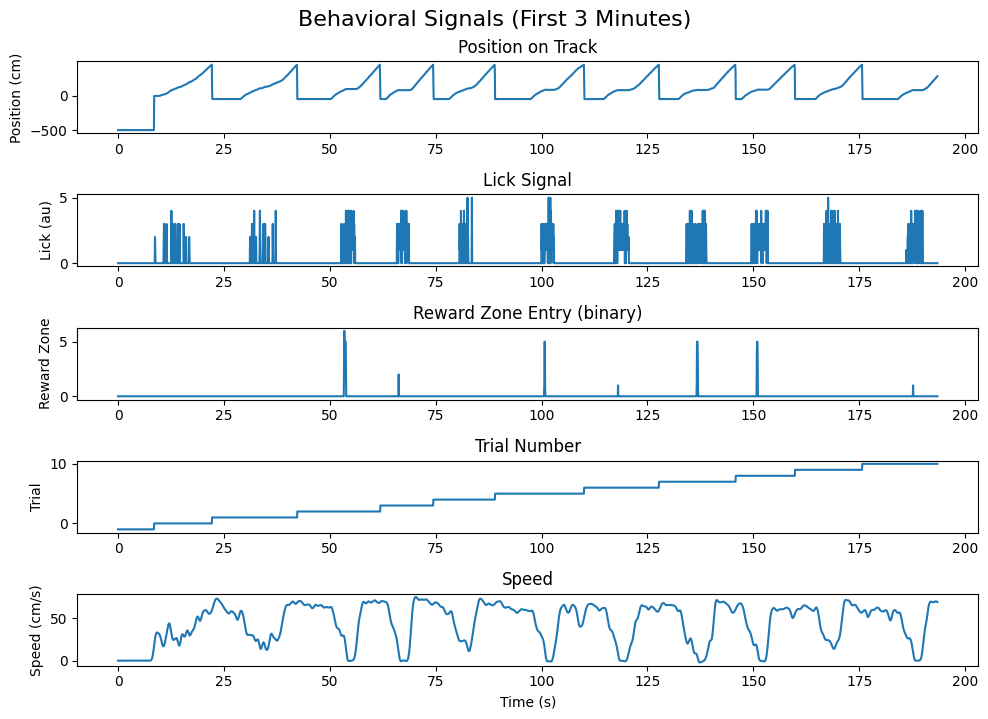

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 3000  # About the first 3 min (at ~15.5 Hz)

behavior_mod = nwb.processing['behavior'].data_interfaces['BehavioralTimeSeries']
beh_signals = {}
for key in ['position', 'lick', 'reward_zone', 'trial number', 'speed']:
    ts = behavior_mod.time_series[key]
    beh_signals[key] = ts.data[:N]

time_sec = np.arange(N) / 15.5

plt.figure(figsize=(10, 7))

plt.subplot(511)
plt.plot(time_sec, beh_signals['position'])
plt.ylabel('Position (cm)')
plt.title('Position on Track')

plt.subplot(512)
plt.plot(time_sec, beh_signals['lick'])
plt.ylabel('Lick (au)')
plt.title('Lick Signal')

plt.subplot(513)
plt.plot(time_sec, beh_signals['reward_zone'])
plt.ylabel('Reward Zone')
plt.title('Reward Zone Entry (binary)')

plt.subplot(514)
plt.plot(time_sec, beh_signals['trial number'])
plt.ylabel('Trial')
plt.title('Trial Number')

plt.subplot(515)
plt.plot(time_sec, beh_signals['speed'])
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.title('Speed')

plt.tight_layout()
plt.suptitle('Behavioral Signals (First 3 Minutes)', y=1.02, fontsize=16)
plt.show()

**Interpretation:**  
- Position and trial number show structured, lap-based VR behavior.
- Lick and reward zone events indicate discrete behavioral moments.
- Speed fluctuates with running and pausing near trial ends.

### Behavioral Signal Summary Statistics

In [6]:
summary_stats = {k: {'min': float(np.min(v)), 
                     'max': float(np.max(v)), 
                     'mean': float(np.mean(v)), 
                     'std': float(np.std(v))} for k, v in beh_signals.items()}
pd.DataFrame(summary_stats)

,position,lick,reward_zone,trial number,speed
min,-500.000000,0.000000,0.000000,-1.000000,-2.080694
max,449.749220,5.000000,6.000000,10.000000,74.886275
mean,71.407831,0.284333,0.029333,4.741667,44.502100
std,186.651622,0.858771,0.359360,3.304986,23.379312


---
## Imaging Max and Mean Projections

Suite2p outputs include summary images used for ROI segmentation:
- **Max Projection:** Each pixel's brightest value across all frames.
- **Mean Projection:** Mean image over the session.

Let's display both.

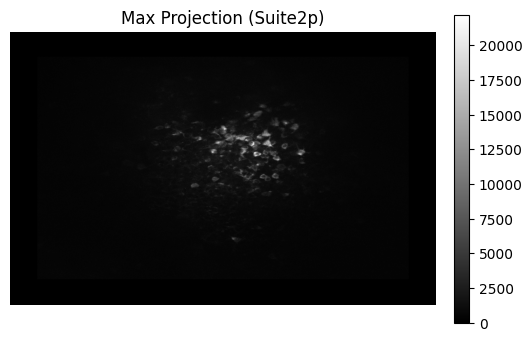

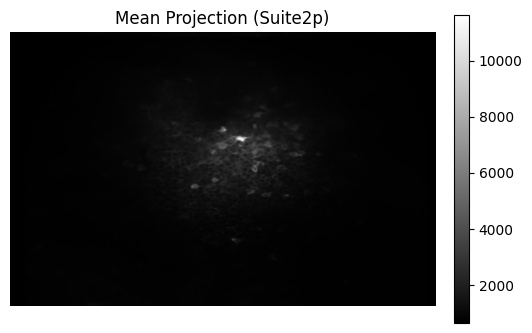

In [7]:
def show_projection(img, title):
    plt.figure(figsize=(6, 4))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.show()

backgrounds = ophys_proc.data_interfaces['Backgrounds_0'].images
max_proj = backgrounds['max_proj'].data[:]
mean_img = backgrounds['meanImg'].data[:]

show_projection(max_proj, 'Max Projection (Suite2p)')
show_projection(mean_img, 'Mean Projection (Suite2p)')

---
## ROI Table and Segmentation Summary

NWB files contain a segmentation table holding Suite2p ROI/cell info and properties.

The "iscell" field (1 = cell, 0 = not a cell) lets you identify putative neurons.

Let's summarize segmentation for this session.

In [8]:
# How many putative cells?
iscell = seg['iscell'].data[:, 0]
n_is_cell = np.sum(iscell == 1)
print(f"Total ROIs: {len(iscell)}")
print(f"Putative cells (iscell=1): {n_is_cell}")

Total ROIs: 358
Putative cells (iscell=1): 189


---
## Working with Fluorescence Traces

Each file provides:
- Raw fluorescence traces (ΔF/F) for every ROI/cell
- Deconvolved traces (approximate spike rates/events)

Let's plot traces for three example putative cells, along with a population mean.

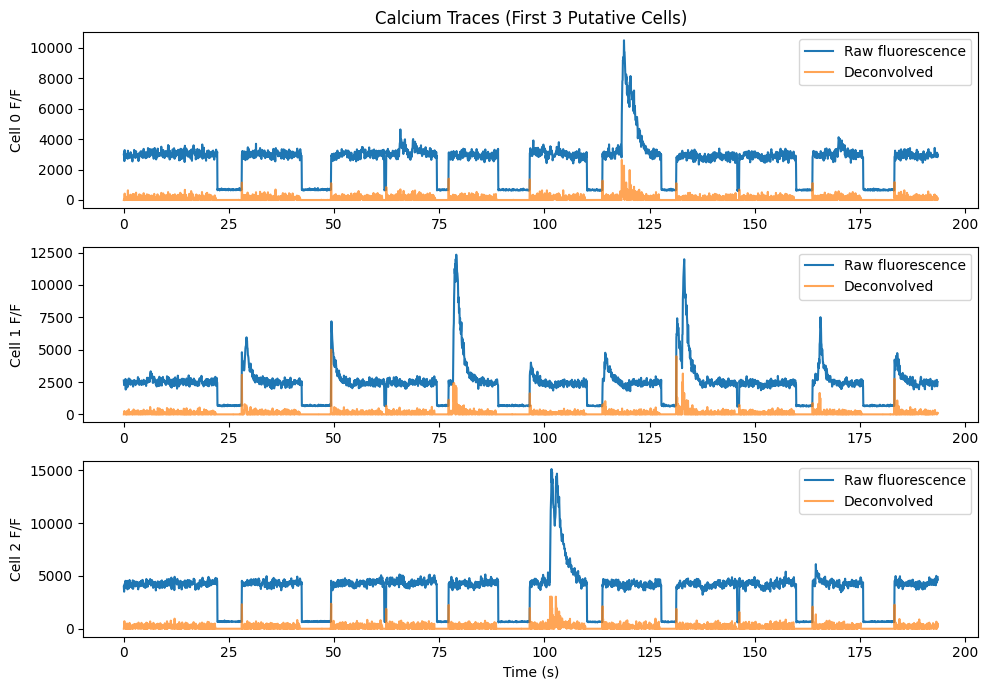

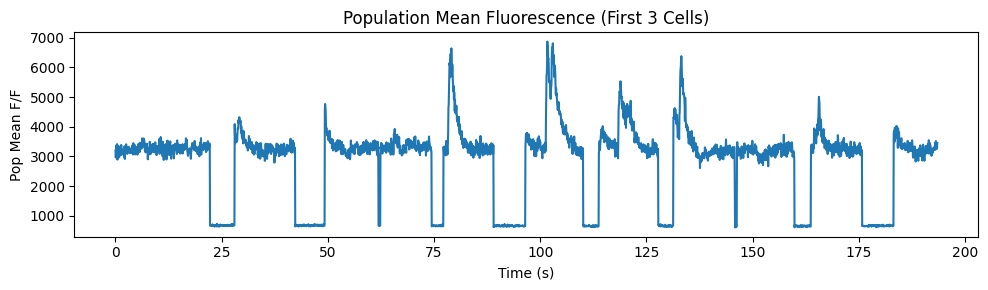

In [9]:
# Get indices of first 3 putative cells
cell_indices = np.where(iscell == 1)[0][:3]
flu_traces = ophys_proc.data_interfaces['Fluorescence'].roi_response_series['plane0'].data[:, cell_indices]
dec_traces = ophys_proc.data_interfaces['Deconvolved'].roi_response_series['plane0'].data[:, cell_indices]

# Plot a short stretch for visual clarity
Ntrace = 3000
time_sec = np.arange(Ntrace) / 15.5

plt.figure(figsize=(10, 7))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(time_sec, flu_traces[:Ntrace, i], label='Raw fluorescence')
    plt.plot(time_sec, dec_traces[:Ntrace, i], label='Deconvolved', alpha=0.7)
    plt.ylabel(f'Cell {cell_indices[i]} F/F')
    plt.legend(loc='upper right')
    if i == 0:
        plt.title('Calcium Traces (First 3 Putative Cells)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

# Population mean (over first 3 cells)
pop_mean = np.mean(flu_traces[:Ntrace, :], axis=1)
plt.figure(figsize=(10, 3))
plt.plot(time_sec, pop_mean, label='Population Mean F/F')
plt.xlabel('Time (s)')
plt.ylabel('Pop Mean F/F')
plt.title('Population Mean Fluorescence (First 3 Cells)')
plt.tight_layout()
plt.show()

---
## How to Go Further

You now have a template for exploring Dandiset 001361:
- List and select sessions or subjects via metadata or behavior.
- Extract and plot behavioral variables and events for any session.
- Access all the traces/cell masks for deep neural population analysis (e.g., place-coding, event-triggered activity, ROI properties, etc).

### What next?
- Repeat these steps for other sessions or animals.
- Align neural and behavioral data to events (reward, trial, etc.).
- Use the full segmentation table and masks for custom cell selection.
- Apply or adapt public [analysis code from the original authors](https://github.com/GiocomoLab/Sosa_et_al_2024).
- Visualize or quantify neural activity for spatial navigation, reward coding, or trial-by-trial learning.

For interactive NWB exploration, try [Neurosift NWB Viewer](https://neurosift.app/nwb?dandisetId=001361&dandisetVersion=0.250406.0045&path=sub-m11/sub-m11_ses-05_behavior+ophys.nwb).

---

_End of notebook._